In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/AI and algorithms lab/Iris.csv')

In [4]:
dataset.shape

(150, 6)

In [5]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset.groupby('Species').size()


,0
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [8]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

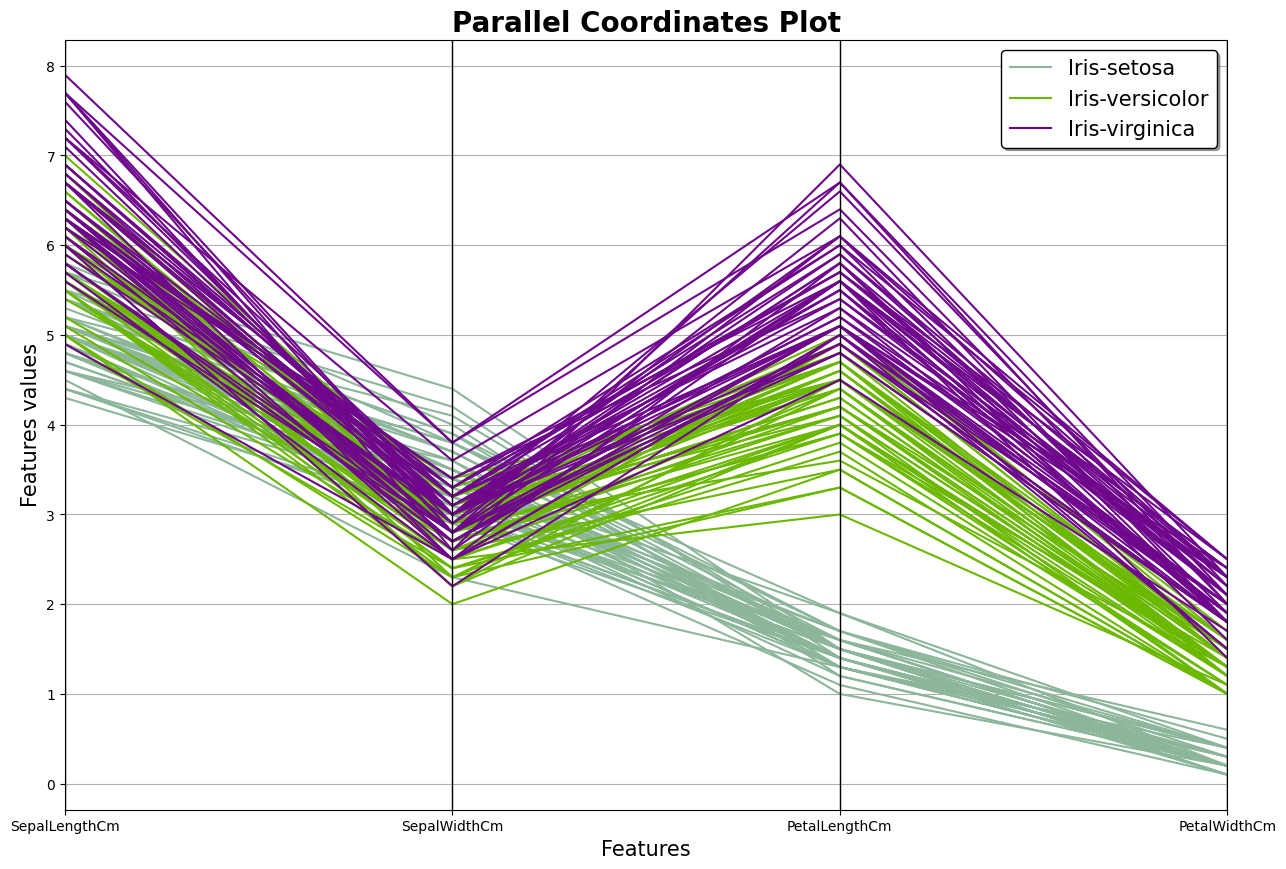

In [36]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

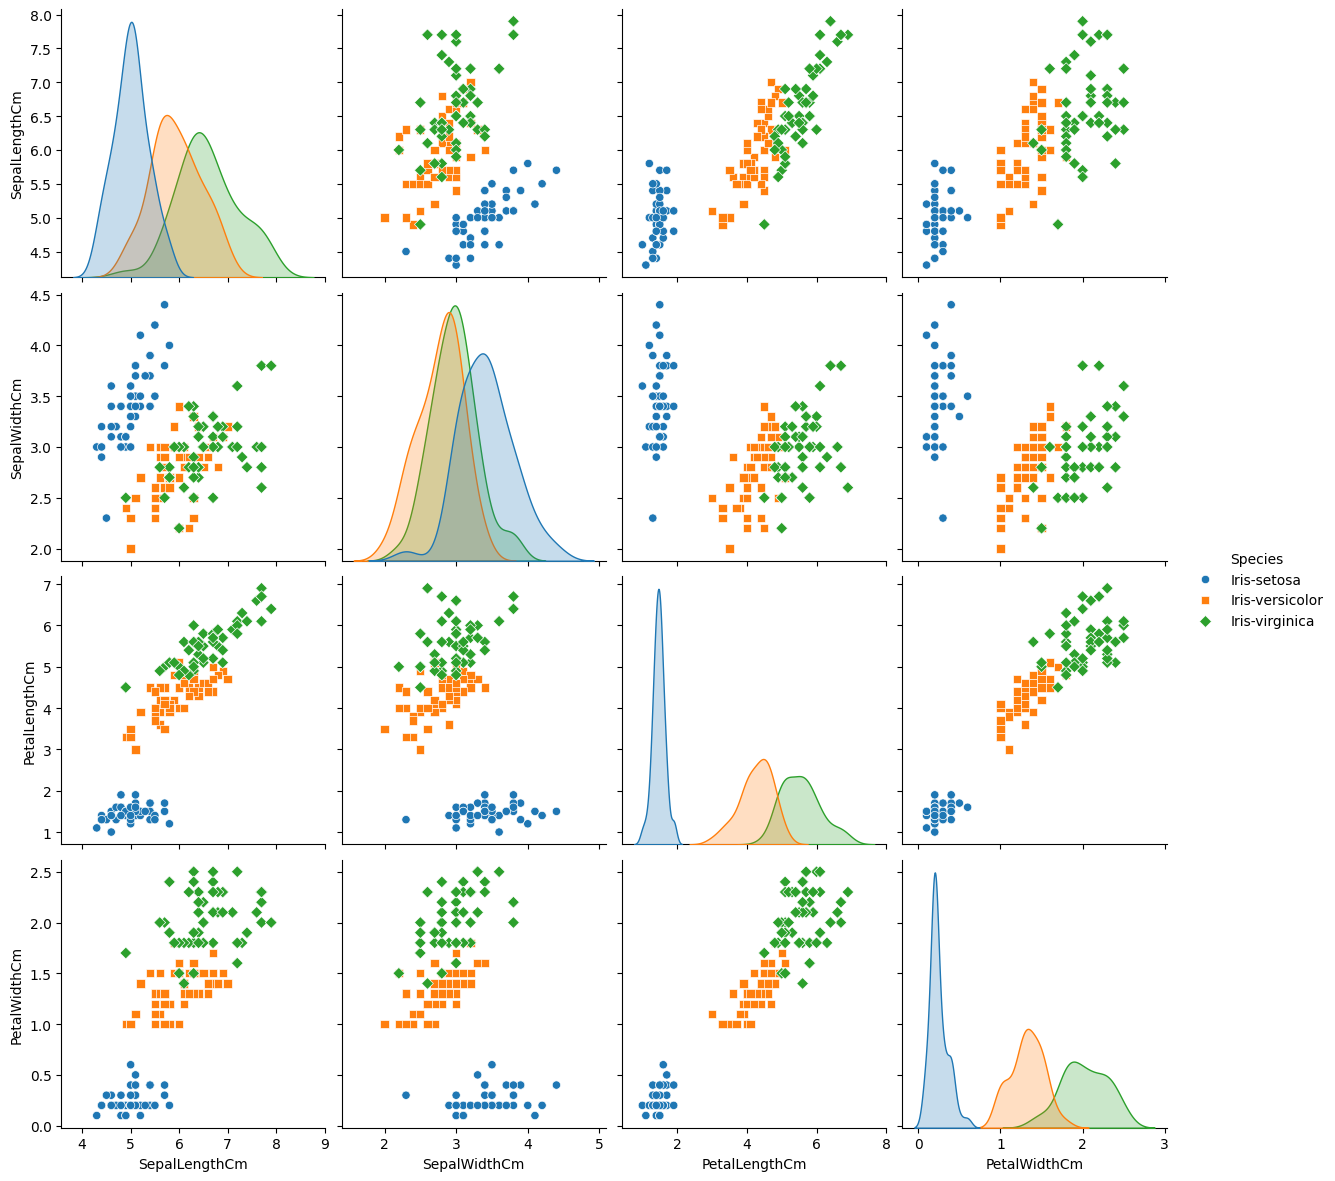

In [14]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

<Figure size 640x480 with 0 Axes>

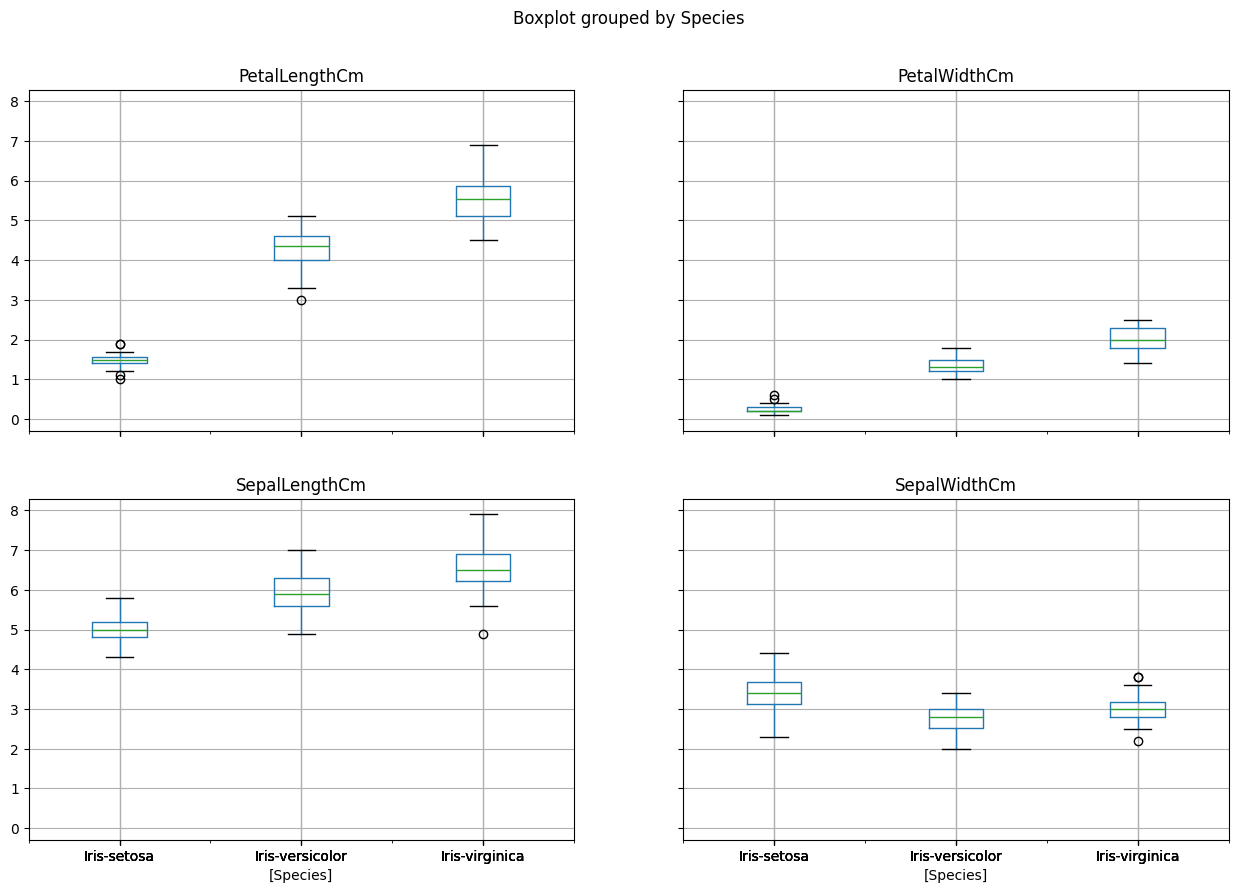

In [37]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

In [24]:

class MyKNeighborsClassifier():
    """
    My implementation of KNN algorithm.
    """

    def __init__(self, n_neighbors=5):
        self.n_neighbors=n_neighbors

    def fit(self, X, y):
        """
        Fit the model using X as array of features and y as array of labels.
        """
        n_samples = X.shape[0]
        # number of neighbors can't be larger then number of samples
        if self.n_neighbors > n_samples:
            raise ValueError("Number of neighbors can't be larger then number of samples in training set.")

        # X and y need to have the same number of samples
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in X and y need to be equal.")

        # finding and saving all possible class labels
        self.classes_ = np.unique(y)

        self.X = X
        self.y = y

    def predict(self, X_test):

        # number of predictions to make and number of features inside single sample
        n_predictions, n_features = X_test.shape

        # allocationg space for array of predictions
        predictions = np.empty(n_predictions, dtype=int)

        # loop over all observations
        for i in range(n_predictions):
            # calculation of single prediction
            predictions[i] = single_prediction(self.X, self.y, X_test[i, :], self.n_neighbors)

        return(predictions)

In [25]:
def single_prediction(X, y, x_train, k):

    # number of samples inside training set
    n_samples = X.shape[0]

    # create array for distances and targets
    distances = np.empty(n_samples, dtype=np.float64)

    # distance calculation
    for i in range(n_samples):
        distances[i] = (x_train - X[i]).dot(x_train - X[i])

    # combining arrays as columns
    distances = np.c_[distances, y]
    # sorting array by value of first column
    sorted_distances = distances[distances[:,0].argsort()]
    # celecting labels associeted with k smallest distances
    targets = sorted_distances[0:k,1]

    unique, counts = np.unique(targets, return_counts=True)
    return(unique[np.argmax(counts)])

In [26]:
# Instantiate learning model (k = 3)
my_classifier = MyKNeighborsClassifier(n_neighbors=5)

# Fitting the model
my_classifier.fit(X_train, y_train)

# Predicting the Test set results
my_y_pred = my_classifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, my_y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


In [32]:
input_features = np.array([[10, 4.4, 10, 1]])
predicted_output = my_classifier.predict(input_features)
predicted_species = le.inverse_transform(predicted_output)
print(f"Predicted Species: {predicted_species[0]}")

Predicted Species: Iris-virginica


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, my_y_pred)
print(cm)


[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [39]:
from sklearn import metrics
print("\nClassification Report:\n",metrics.classification_report(y_test, my_y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

